# Project: Marketing Budget Optimization using Multiple Linear Regression

## Project Overview
The objective of this analysis is to evaluate the impact of various marketing channels—TV, Radio, Social Media, and Influencers—on total Sales. By building a predictive model, I aim to provide actionable insights for the marketing team to optimize budget allocation and maximize revenue.

## Methodology
*   **Data Exploration (EDA):** Visualization of relationships using Seaborn (pairplots and boxplots).
*   **Data Cleaning:** Handling missing values and standardizing feature names (e.g., converting 'Social Media' to 'Social_Media' for model compatibility).
*   **Modeling:** Multiple Linear Regression using the Ordinary Least Squares (OLS) method.
*   **Statistical Validation:** One-way ANOVA and Tukey’s HSD post-hoc test to analyze the effectiveness of categorical budget tiers.
*   **Assumption Checks:** Verifying Linearity, Independence, Normality, and Homoscedasticity to ensure model validity.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Step 1: Data loading and exploration

In [2]:
data = pd.read_csv('marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


The features in the data:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)

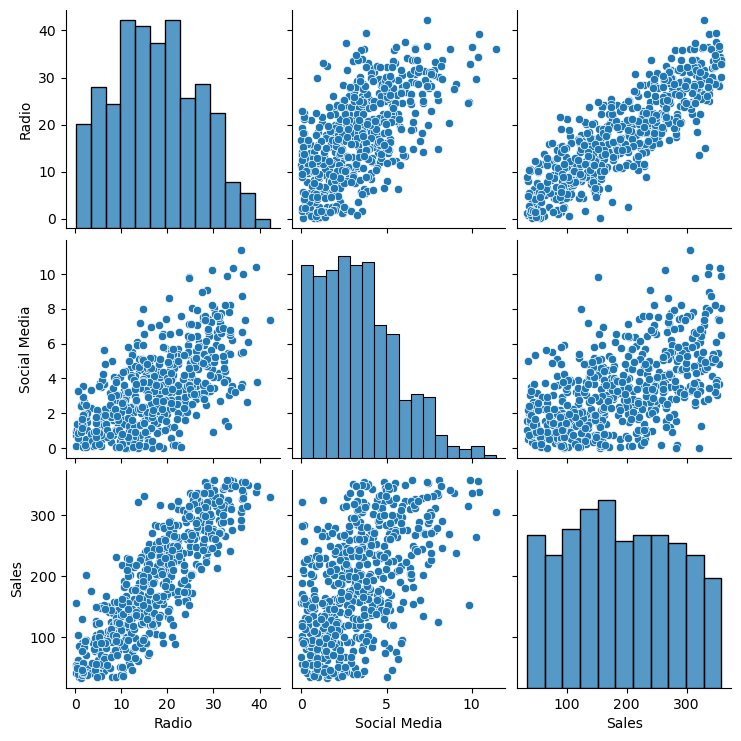

In [3]:
#Create a pairplot to visualize the relationship between the continous variables in data

sns.pairplot(data)

`Radio` and `Social Media` have linear relationships with `Sales`. So, both may be useful as independent variables in a multiple linear regression model estimating `Sales`. 

<Axes: xlabel='TV', ylabel='Sales'>

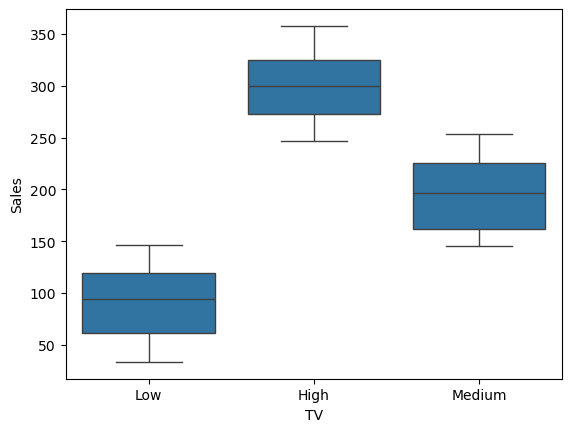

In [5]:
# Creat boxplot to determine how Sales vary based on the categorical variables TV and Influencer
sns.boxplot(x = "TV", y = "Sales", data = data);

There is considerable variation in `Sales` across the `TV` groups.

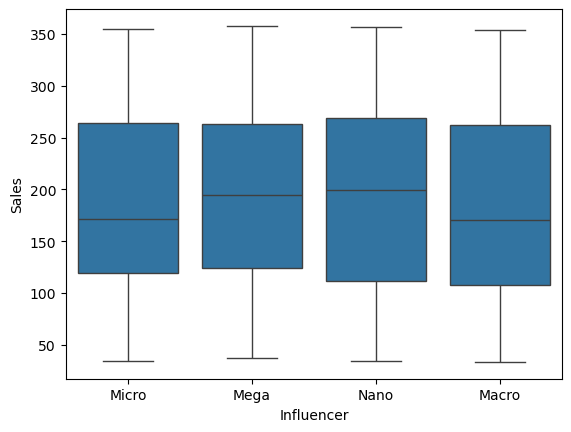

In [7]:
sns.boxplot(x = "Influencer", y = "Sales", data = data);

There is no significant variation in `Sales` across the `Influencer` groups.

In [4]:
# For successful execution of ols() funsion

# Drop rows that contain missing data and update the DataFrame 
data = data.dropna(axis=0)

# Rename columns in data that contain a space.
data = data.rename(columns={'Social Media': 'Social_Media'})

## Step 2: Model building

Fit a multiple linear regression model that predicts sales using two variables.

* `TV` was selected, as the preceding analysis showed a strong relationship between the `TV` promotional budget and the average `Sales`.
* `Radio` was selected because the pairplot showed a strong linear relationship between `Radio` and `Sales`.
* `Social Media` was not selected because it did not increase model performance and it was later determined to be correlated with another independent variable: `Radio`.
* `Influencer` was not selected because it did not show a strong relationship to `Sales` in the preceding analysis.

In [9]:
# Create an OLS model.

OLS = ols(formula = 'Sales ~ C(TV) + Radio', data = data)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Mon, 23 Feb 2026   Prob (F-statistic):          1.63e-288
Time:                        10:35:13   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Summary Interpretation
After fitting the multiple linear regression model, the following key metrics were observed:

*   **R-squared and Adjusted R-squared (0.904):** The model explains **90.4%** of the variation in Sales. This indicates an extremely high explanatory power, meaning our chosen features (TV budget and Radio spend) are excellent predictors of revenue.
*   **F-statistic P-value (1.63e-288):** The probability of the overall model being significant is effectively zero. This confirms that the model as a whole is statistically valid.

#### Coefficients Breakdown:
1.  **Intercept (218.5261):** This represents the baseline sales when the TV budget is at the **High** level (the reference group) and Radio spend is zero.
2.  **Radio (2.9669):** There is a strong positive relationship. For every additional **$1 million** spent on Radio, Sales increase by approximately **2.97 units**, holding TV budget constant.
3.  **TV Low (-154.2971):** Compared to a "High" budget, a **"Low"** TV budget results in an average decrease of **154.30 units** in sales.
4.  **TV Medium (-75.3120):** Compared to a "High" budget, a **"Medium"** TV budget results in an average decrease of **75.31 units** in sales.

**Conclusion:** Both TV and Radio show a significant impact on sales. The next step is to verify if this model meets all statistical assumptions to ensure these estimates are reliable.

## Step 3: Check model assumptions

### Model assumption: Linearity

<Axes: xlabel='Radio', ylabel='Sales'>

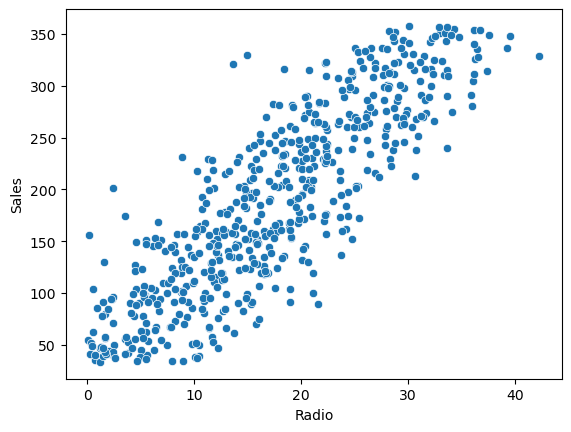

In [11]:
# Create a scatterplot between Radio and Sales.
sns.scatterplot(x = data['Radio'], y = data['Sales'])

The linearity assumption holds for `Radio`, as there is a clear linear relationship in the scatterplot between `Radio` and `Sales`

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

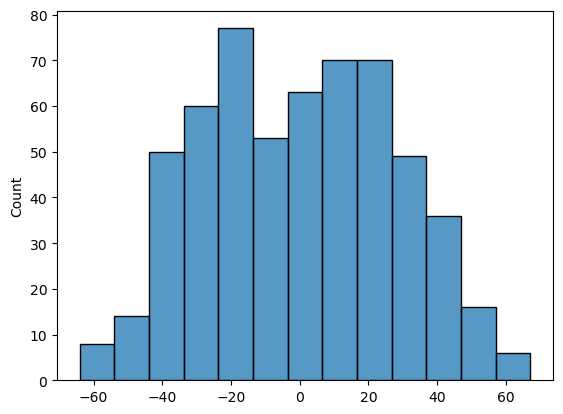

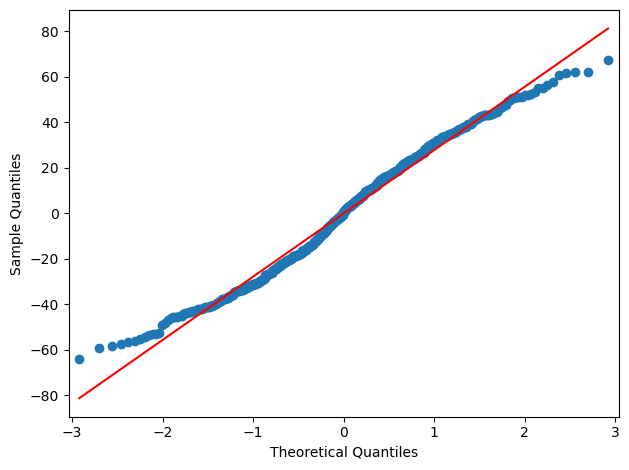

In [16]:
# Calculate the residuals.
residuals = model.resid

# Create a histogram with the residuals. 
sns.histplot(residuals)

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s')

plt.tight_layout()


The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model. The residuals in the Q-Q plot form a straight line, further supporting that this assumption is met.

### Model assumption: Constant variance

<Axes: xlabel='None', ylabel='None'>

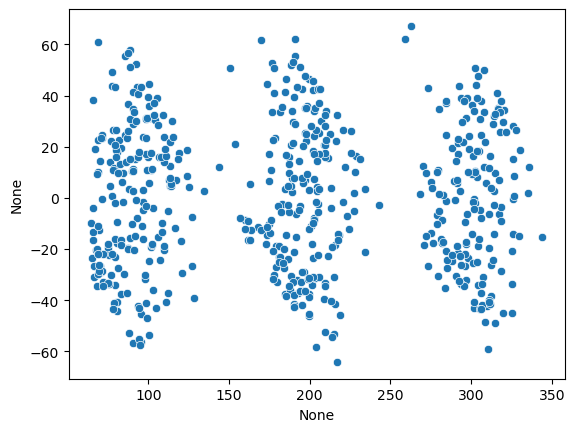

In [17]:
# Create a scatterplot with the fitted values from the model and the residuals.
sns.scatterplot(x = model.fittedvalues, y = model.resid)

Variance is similarly distributed, validating that the assumption is met.

### Model assumption: No multicollinearity

The preceding model only has one continous independent variable, meaning there are no multicollinearity issues.

## Step 4: Detailed Analysis of Categories

ANOVA for the Multiple Regression Model
Since the model includes both categorical (TV) and continuous (Radio) variables, I performed an ANOVA to partition the variance and evaluate the contribution of each predictor

In [20]:
# Create an ANOVA table for the fit model.

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),773796.193931,2.0,496.398707,2.111110e-125
Radio,153089.893455,1.0,196.417676,1.536301e-38
Residual,442704.857579,568.0,NaN,NaN


**Statistical Significance:** Both **TV budget tiers (C(TV))** and **Radio spend** show extremely low p-values (PR(>F)), far below the 0.05 threshold. This confirms that both marketing channels are highly significant drivers of Sales.
**Effect Size:** The large F-statistics (496.39 for TV and 196.41 for Radio) indicate that the variation in sales explained by these variables is much greater than the variation due to random noise.

In [25]:
# Perform the Tukey's HSD post hoc test.
tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["TV"])

tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-209.8691,0.0,-217.8438,-201.8944,True
High,Medium,-105.4952,0.0,-113.4346,-97.5557,True
Low,Medium,104.3739,0.0,96.8261,111.9218,True


**Significant Differences:** The **reject=True** status for all pairs confirms that every level of TV budget leads to a statistically significant difference in Sales revenue.

**Key Comparisons:**


   **High vs. Low:** Moving from a Low to a High TV budget results in an average sales increase of approximately **210 units**.
   
   **High vs. Medium:** Even moving from a Medium to a High budget provides a significant boost of about **105 units**.
   
   **Medium vs. Low:** Increasing spend from Low to Medium results in an increase of **104 units**.


## Step 5. Key Findings & Results

### Model Performance
*   **High Explanatory Power:** The model achieved an **Adjusted R-squared of 0.904**, meaning it explains **90.4%** of the variance in sales.
*   **Statistical Significance:** All selected predictors (Radio and TV tiers) have **p-values of 0.000**, confirming their strong impact on sales revenue.

### Channel Insights
*   **TV Budget Tiers:** ANOVA and Tukey’s HSD tests confirmed that sales significantly differ across all TV budget levels. Moving from a **Low to High** budget increases sales by approximately **208 units**, while moving from **Medium to High** adds another **101 units**.
*   **Radio Power:** Radio shows a strong positive linear relationship. Each 1 million increase in Radio spend leads to an average increase of 2.97 million in sales.
*   **Influencer & Social Media:** 
    *   **Influencers** (Mega, Macro, Micro, Nano) showed no significant impact on sales distribution, as evidenced by the boxplot analysis.
    *   **Social Media** spend was excluded from the final model due to high multicollinearity with Radio, suggesting these channels may overlap in their reach.

### Business Recommendations
1.  **Prioritize TV and Radio:** These are the primary growth drivers. Budget should be shifted from Influencer marketing toward TV and Radio channels for higher ROI.
2.  **Scale TV Promotion:** If budget allows, shifting from "Medium" to "High" TV spend is highly recommended as it provides a statistically significant revenue boost.
3.  **Data Reliability:** The model passed all major statistical assumptions (Normality of residuals, Homoscedasticity, and Linearity), making these predictions highly reliable for future budget planning.